<a href="https://colab.research.google.com/github/ikromergash/My_new_repos/blob/main/%22%22Chir_predict_ipynb_out_Ugam%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. ОПРЕДЕЛЕНИЕ ВЕГЕТАЦИОННОГО СТОКА**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('https://github.com/ikromergash/Pritoki_Syr/blob/main/Chir_data_set.csv?raw=True', sep=';')
df = df.drop(['Apr', 'May', 'June', 'July', 'Aug',	'Sep'], axis=1)
df.loc[:5]

,Okt,Nov,Dec,Jan,Feb,March,Okt-Nov,Okt-Dec,Okt-Jan,Okt-Feb,Mejveg,Veg
0,245.84,208.84,181.58,168.21,146.58,207.00,454.67,636.25,804.46,951.04,1158.0,4889
1,253.64,215.47,187.34,172.46,150.26,212.24,469.10,656.44,828.91,979.16,1191.0,5012
2,260.06,220.92,192.08,171.44,149.37,210.99,480.97,673.05,844.50,993.87,1205.0,4983
3,258.52,219.61,190.95,154.71,134.79,190.39,478.13,669.08,823.79,958.57,1149.0,4496
4,233.28,198.17,172.30,135.66,118.22,166.94,431.45,603.76,739.41,857.63,1025.0,3943
5,204.56,173.77,151.09,102.77,89.54,126.47,378.33,529.41,632.18,721.72,848.0,2987


In [ ]:
df.describe()

,Okt,Nov,Dec,Jan,Feb,March,Okt-Nov,Okt-Dec,Okt-Jan,Okt-Feb,Mejveg,Veg
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,267.247326,226.327819,197.838513,177.077054,156.749205,239.515502,493.575179,691.413750,868.491250,1025.240179,1264.729464,5185.678571
std,53.777885,49.555529,40.280276,33.973712,31.848914,78.963032,99.138082,136.643674,164.407146,190.147240,245.806924,1323.217545
min,154.960000,131.640000,114.460000,102.770000,89.540000,115.960000,286.610000,401.070000,534.160000,650.120000,808.000000,2987.000000
25%,233.140000,189.460000,171.390000,156.527500,135.827500,189.590000,423.937500,590.755000,745.072500,889.267500,1101.000000,4207.500000
50%,260.450000,219.705000,193.485000,172.330000,149.310000,217.265000,487.230000,684.390000,863.305000,1016.600000,1231.000000,4986.500000
75%,290.812500,245.907500,216.947500,192.905000,171.370000,267.210000,536.082500,751.400000,944.170000,1115.262500,1381.250000,5993.750000
max,492.750000,438.050000,335.930000,316.000000,262.780000,532.480000,930.800000,1265.550000,1581.550000,1833.130000,2100.000000,10370.000000


 **Маълумотлар бизда оз бўлгани учун Қаторларни вегетация даврига келган сувлар буйича категорияларга ажратиб чиқамиз**

In [ ]:
df['vodnost'] = pd.cut(df.Veg, bins=[0, 3800, 4500, 5600, 6400, np.inf], labels=[1, 2, 3, 4, 5])
df['vodnost'].value_counts()

3    37
2    25
4    22
5    16
1    12
Name: vodnost, dtype: int64

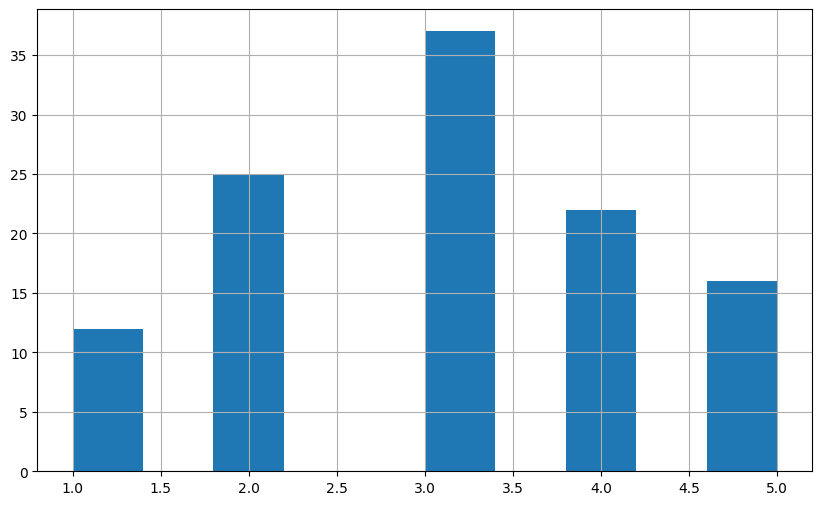

In [ ]:
df['vodnost'].hist(figsize=(10,6))
plt.show()

In [ ]:
df.corrwith(df.Veg, numeric_only=True)

Okt        0.288711
Nov        0.362038
Dec        0.412420
Jan        0.468697
Feb        0.511136
March      0.526410
Okt-Nov    0.337576
Okt-Dec    0.366499
Okt-Jan    0.401461
Okt-Feb    0.432729
Mejveg     0.503793
Veg        1.000000
dtype: float64

In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import linear_model

In [ ]:
strat = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)


**StratifiedShuffleSplit бизга фақат индекслар қайдаргани учун биз индекслардар фойдаланиб датафрейм ясаймиз**

In [ ]:
for train_idx, test_idx in strat.split(df, df['vodnost']):
  train_set = df.loc[train_idx]
  test_set = df.loc[test_idx]

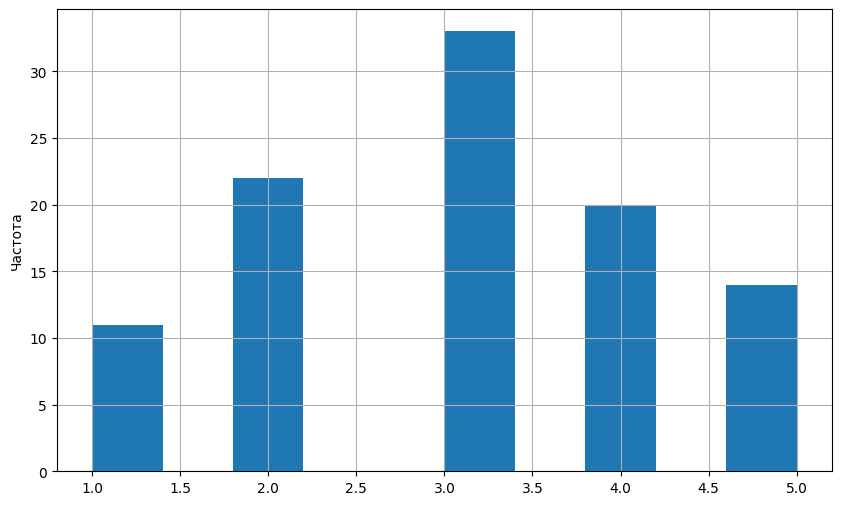

In [ ]:
train_set['vodnost'].hist(figsize=(10,6))
plt.ylabel('Частота')
plt.show()

In [ ]:
# train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)

In [ ]:
train_set[['Okt', 'Nov', 'Dec', 'Okt-Nov', 'Okt-Dec']]

,Okt,Nov,Dec,Okt-Nov,Okt-Dec
76,297.26,241.06,193.08,538.31,731.40
71,226.29,197.25,171.39,423.54,594.93
19,279.97,237.83,206.79,517.80,724.59
108,302.07,245.36,216.33,547.43,763.76
93,289.79,241.92,229.31,531.71,761.01
...,...,...,...,...,...
84,270.48,210.21,187.46,480.69,668.15
49,326.72,251.68,212.37,578.40,790.76
99,323.20,263.80,224.60,587.00,811.60
98,371.00,269.00,232.40,640.00,872.40


In [ ]:
x_train = np.asanyarray(train_set[['Okt', 'Nov', 'Dec']])
y_train = np.asanyarray(train_set[['Veg']])
x_test = np.asanyarray(test_set[['Okt', 'Nov', 'Dec']])
y_test = np.asanyarray(test_set[[ 'Veg']])

**1.1 Прогнозирование с методом LinearRegression**

In [ ]:
MLR_model = linear_model.LinearRegression()

In [ ]:
MLR_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
MLR_model.coef_.round(2)

array([[-2.84, -4.45, 21.09]])

In [ ]:
MLR_model.intercept_.round(2)

array([2773.46])

In [ ]:
y_predict = MLR_model.predict(x_test)

In [ ]:
val = pd.DataFrame({'Прогноз':y_predict.ravel(), 'Fact': y_test.ravel()})
val['Otkloneniya %'] = (val['Прогноз'] - val.Fact) *100 / val.Fact
val.round()

,Прогноз,Fact,Otkloneniya %
0,5570.0,7642,-27.0
1,4685.0,3921,19.0
2,4863.0,3943,23.0
3,5259.0,7369,-29.0
4,5741.0,6289,-9.0
5,4931.0,4681,5.0
6,4350.0,3346,30.0
7,5388.0,5462,-1.0
8,6848.0,5625,22.0
9,4944.0,4997,-1.0


In [ ]:
pred = y_predict.mean()
fact = y_test.mean()
print(f'Pred_mean={round(pred)} \ny_test={round(fact)} \nOtklon={round((pred-fact)*100/fact, 2)}%')

Pred_mean=5213 
y_test=5264 
Otklon=-0.98%


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test, y_predict)
RMSE = mean_squared_error(y_test, y_predict)
print(f'MAE={round(MAE)} \nRMSE={round(RMSE**0.5)}')

MAE=840 
RMSE=1065


**1.2 RandomForest модели билан хам башорат килиб курамиз**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF_model = RandomForestRegressor()
RF_model.fit(x_train, y_train.ravel())

RandomForestRegressor()

In [ ]:
y_predict_RF = RF_model.predict(x_test)

In [ ]:
MAE_RF = mean_absolute_error(y_test, y_predictRF)
print(f'MAE={round(MAE_RF)}')

MAE=1116


In [ ]:
dict = pd.DataFrame({'Bashorat_MLR':y_predict.ravel(), 'Fact': y_test.ravel(), 'Bashorat_RF':y_predictRF.ravel()})
dict.round()

,Bashorat_MLR,Fact,Bashorat_RF
0,5570.0,7642,6443.0
1,4685.0,3921,4914.0
2,4863.0,3943,5312.0
3,5259.0,7369,5992.0
4,5741.0,6289,4835.0
5,4931.0,4681,5639.0
6,4350.0,3346,5280.0
7,5388.0,5462,4945.0
8,6848.0,5625,5178.0
9,4944.0,4997,6147.0


**2. ОПРЕДЕЛЕНИЕ МЕЖВЕГЕТАЦИОННОГО СТОКА ЗА ЯНВ-МАРТ**

In [ ]:
df_mej = pd.read_csv('https://github.com/ikromergash/Pritoki_Syr/blob/main/Chir_data_set.csv?raw=True', sep=';')
df_mej = df_mej.drop(['Apr', 'May', 'June', 'July', 'Aug',	'Sep'], axis=1)
df_mej.insert(10, 'Jan-March',df_mej.Mejveg - df_mej['Okt-Dec'], False)

In [ ]:
df_mej.corrwith(df_mej['Jan-March'], numeric_only=True)

Okt          0.601670
Nov          0.638120
Dec          0.708410
Jan          0.868498
Feb          0.892484
March        0.935616
Okt-Nov      0.645344
Okt-Dec      0.677038
Okt-Jan      0.742176
Okt-Feb      0.791198
Jan-March    1.000000
Mejveg       0.912484
Veg          0.559681
dtype: float64

**2.1. Прогнозируем по методу LinearRegression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
train_set, test_set = train_test_split(df_mej, test_size=0.1, random_state=42)
x_trainJ_M = np.asanyarray(train_set[['Okt', 'Nov', 'Dec']])
y_trainJ_M = np.asanyarray(train_set[['Jan-March']])
x_testJ_M = np.asanyarray(test_set[['Okt', 'Nov', 'Dec']])
y_testJ_M = np.asanyarray(test_set[['Jan-March']])

MLR_J_M = linear_model.LinearRegression()

In [ ]:
MLR_J_M.fit(x_trainJ_M, y_trainJ_M)

LinearRegression()

In [ ]:
y_predictJ_M = MLR_J_M.predict(x_testJ_M)
dem = pd.DataFrame({'Bashorat_MLR':y_predictJ_M.ravel(), 'Fact': y_testJ_M.ravel()})
dem['Otkloneniya %'] = (dem.Bashorat_MLR - dem.Fact) *100 / dem.Fact
dem.round()

,Bashorat_MLR,Fact,Otkloneniya %
0,722.0,650.0,11.0
1,490.0,465.0,5.0
2,511.0,421.0,21.0
3,611.0,540.0,13.0
4,678.0,645.0,5.0
5,522.0,511.0,2.0
6,405.0,440.0,-8.0
7,628.0,583.0,8.0
8,956.0,600.0,59.0
9,514.0,450.0,14.0


In [ ]:
print(f'Прогноз:{round(dem.Bashorat.mean())} mln.m3 \nФакт:{round(dem.Fact.mean())} mln.m3 \nОтк:{round(dem.Bashorat.mean() / dem.Fact.mean(),2)} %')
MAE_J_M = mean_absolute_error(y_testJ_M, y_predictJ_M)
print('sred_arif_oshibka=', round(MAE_J_M), 'mln.m3')

Прогноз:592 mln.m3 
Факт:526 mln.m3 
Отк:1.13 %
sred_arif_oshibka= 74 mln.m3


**2.2 Прогнозируем по методу RandomForest**

In [ ]:
RF_model_J_M = RandomForestRegressor()
RF_model_J_M.fit(x_trainJ_M, y_trainJ_M.ravel())

RandomForestRegressor()

In [ ]:
y_predict_RF_J_M = RF_model_J_M.predict(x_testJ_M)
MAE_RF_J_M = mean_absolute_error(y_testJ_M, y_predict_RF_J_M)
print('sred_arif_oshibka=', round(MAE_RF_J_M), 'mln.m3')

sred_arif_oshibka= 75 mln.m3


In [ ]:
dict_J_M = pd.DataFrame({'Bashorat_MLR':y_predictJ_M.ravel(), 'Fact': y_testJ_M.ravel(), 'BashoratRF':y_predict_RF_J_M.ravel()})
dict_J_M.round()

,Bashorat_MLR,Fact,BashoratRF
0,722.0,650.0,841.0
1,490.0,465.0,516.0
2,511.0,421.0,513.0
3,611.0,540.0,613.0
4,678.0,645.0,685.0
5,522.0,511.0,499.0
6,405.0,440.0,393.0
7,628.0,583.0,584.0
8,956.0,600.0,875.0
9,514.0,450.0,481.0


**Прогноз на на 1-й квартал 2024 года и на вегетацию 2024 года**

In [ ]:
x_fact_V = [[255.3, 233.6, 221.0]]
x_fact_MV = [[255.3, 233.6, 221.0]]

W_veg_LR = MLR_model.predict(x_fact_V).ravel()[0].round()
W_veg_RF = RF_model.predict(x_fact_V).ravel()[0].round()
W_J_M_LR = MLR_J_M.predict(x_fact_MV).ravel()[0].round()
W_J_M_RF = RF_model_J_M.predict(x_fact_MV).ravel()[0].round()

In [ ]:
print(f'Янв-Март_2024_LR={W_J_M_LR} \nЯнв-Март_2024_RF={W_J_M_RF} \n\nВег_2024_LR={W_veg_LR} \nВег_2024_RF={W_veg_RF}')

Янв-Март_2024_LR=633.0 
Янв-Март_2024_RF=622.0 

Вег_2024_LR=5670.0 
Вег_2024_RF=5686.0
